# Flag investigation

- Flags are probably digit coded
- Scale magnetometer on Swam C is broken so it alwas produse an error code
- Most effecient filtering is still the latitude
- Consider to filter values near around Flaged values.

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
FAC = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_dual.pkl')

In [3]:
#FAC = FAC[abs(FAC.Latitude)>40]

In [4]:
FAC_p = FAC['20150310':'20150320']
N_total=len(FAC)
odd_val = len(FAC[abs(FAC.FAC)>20])

In [5]:
FAC.head()

,Latitude,Longitude,Radius,IRC,IRC_Error,FAC,FAC_Error,Flags,Flags_F,Flags_B,Flags_q,Orbit_nr,Hemisphere
2015-01-02 00:00:00.500,-74.064067,-135.102502,6.844350e+06,-0.849996,0.042043,-0.883094,0.043680,0.0,22222224.0,2.0,400.0,0.0,-1.0
2015-01-02 00:00:01.500,-74.126940,-135.067437,6.844351e+06,-0.694960,0.042202,-0.721999,0.043844,0.0,22222224.0,2.0,400.0,0.0,-1.0
2015-01-02 00:00:02.500,-74.189805,-135.032069,6.844352e+06,-0.531154,0.042362,-0.551803,0.044009,0.0,22222224.0,2.0,400.0,0.0,-1.0
2015-01-02 00:00:03.500,-74.252664,-134.996392,6.844353e+06,-0.372390,0.042523,-0.386855,0.044175,0.0,22222224.0,2.0,400.0,0.0,-1.0
2015-01-02 00:00:04.500,-74.315515,-134.960404,6.844354e+06,-0.250209,0.042686,-0.259921,0.044342,0.0,22222224.0,2.0,400.0,0.0,-1.0


## Flags

In [6]:
max(FAC.Flags)

4400000.0

In [7]:
flags = len(FAC[(FAC.Flags!=0)])
flag_odd = len(FAC[(FAC.Flags!=0)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 87160 out off 4287278 or 2.03 procent
Flaged odd values 22 out off 959 or 2.29 procent


## Flags_f

In [8]:
np.unique(FAC.Flags_F)

array([ 22222224.,  22222234.,  22222244.,  22222324.,  22222334.,
        22222344.,  22222424.,  22222444.,  22223224.,  22223234.,
        22223244.,  22224224.,  22224234.,  22224244.,  22232224.,
        22232234.,  22232244.,  22232324.,  22232344.,  22232424.,
        22242224.,  22242324.,  22242424.,  22322224.,  22322244.,
        22322324.,  22322344.,  22322424.,  22322444.,  22323224.,
        22323234.,  22324224.,  22324234.,  22324244.,  22332224.,
        22332244.,  22332324.,  22332344.,  22332424.,  22333224.,
        22342224.,  22342324.,  22342424.,  22422424.,  22432244.,
        22432324.,  22432424.,  22442324.,  22442424.,  33333334.,
        33333344.,  33333434.,  33334334.,  33334344.,  33343334.,
        33343434.,  33433434.,  33443434.,  44444444.])

In [9]:
flags = len(FAC[(FAC.Flags_F!=22222224)])
flag_odd = len(FAC[(FAC.Flags_F!=22222224)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 76271 out off 4287278 or 1.78 procent
Flaged odd values 414 out off 959 or 43.17 procent


In [10]:
flags_codes = np.unique(FAC.Flags_F).astype('int32')
obs_remove = np.zeros(len(flags_codes))
odd_remove = np.zeros(len(flags_codes))
obs_remove[0] = len(FAC[(FAC.Flags_F>flags_codes[0])])
odd_remove[0] = len(FAC[(FAC.Flags_F>flags_codes[0])&(abs(FAC.FAC)>20)])

for i in range(1,len(flags_codes)):
    obs_remove[i] = len(FAC[(FAC.Flags_F>flags_codes[i])])
    odd_remove[i] = len(FAC[(FAC.Flags_F>flags_codes[i])&(abs(FAC.FAC)>20)])
    n = obs_remove[i-1]-obs_remove[i]
    n_odd = odd_remove[i-1]-odd_remove[i]
    print("%d values are flaged with %d and %.2f procent of those are outliers" % (n,flags_codes[i]-22222222,n_odd/n*100))

1168 values are flaged with 12 and 0.00 procent of those are outliers
67967 values are flaged with 22 and 0.01 procent of those are outliers
835 values are flaged with 102 and 0.00 procent of those are outliers
4 values are flaged with 112 and 0.00 procent of those are outliers
52 values are flaged with 122 and 0.00 procent of those are outliers
94 values are flaged with 202 and 0.00 procent of those are outliers
11 values are flaged with 222 and 0.00 procent of those are outliers
63 values are flaged with 1002 and 19.05 procent of those are outliers
18 values are flaged with 1012 and 44.44 procent of those are outliers
31 values are flaged with 1022 and 29.03 procent of those are outliers
12 values are flaged with 2002 and 33.33 procent of those are outliers
7 values are flaged with 2012 and 85.71 procent of those are outliers
20 values are flaged with 2022 and 100.00 procent of those are outliers
2921 values are flaged with 10002 and 1.44 procent of those are outliers
3 values are fl

The fourth digit have a great influence on outliers it is the "At least one of 4 nearest ASM samples is su
spicious" flag

In [11]:
np.unique(FAC.Flags_F).astype('int_')

array([22222224, 22222234, 22222244, 22222324, 22222334, 22222344,
       22222424, 22222444, 22223224, 22223234, 22223244, 22224224,
       22224234, 22224244, 22232224, 22232234, 22232244, 22232324,
       22232344, 22232424, 22242224, 22242324, 22242424, 22322224,
       22322244, 22322324, 22322344, 22322424, 22322444, 22323224,
       22323234, 22324224, 22324234, 22324244, 22332224, 22332244,
       22332324, 22332344, 22332424, 22333224, 22342224, 22342324,
       22342424, 22422424, 22432244, 22432324, 22432424, 22442324,
       22442424, 33333334, 33333344, 33333434, 33334334, 33334344,
       33343334, 33343434, 33433434, 33443434, 44444444])

In [12]:
((np.unique(FAC.Flags_F)%10**4)/1000).astype('int_')

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4])

In [13]:
flags = len(FAC[(((FAC.Flags_F%10**4)/1000).astype('int_')>2)])
flag_odd = len(FAC[(((FAC.Flags_F%10**4)/1000).astype('int_')>2)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 500 out off 4287278 or 0.01 procent
Flaged odd values 346 out off 959 or 36.08 procent


# Flags_B

In [14]:
np.unique(FAC.Flags_B).astype('int32')

array([       2,       12,       22,       32,       42,      102,
           1002,     1022,     1042,     2002,    10002, 11110113,
       11111112, 11111113, 11111122, 11111123, 11111142, 11111143,
       11112113, 11112143, 22222222, 22222224, 22222232, 22222242,
       22222244, 33333333, 33333343, 33333344, 44444444], dtype=int32)

In [15]:
flags = len(FAC[(FAC.Flags_B!=2)])
flag_odd = len(FAC[(FAC.Flags_B!=2)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 10384 out off 4287278 or 0.24 procent
Flaged odd values 816 out off 959 or 85.09 procent


In [16]:
flags_codes = np.unique(FAC.Flags_B).astype('int32')
obs_remove = np.zeros(len(flags_codes))
odd_remove = np.zeros(len(flags_codes))

obs_remove[0] = len(FAC[(FAC.Flags_B>flags_codes[0])])
odd_remove[0] = len(FAC[(FAC.Flags_B>flags_codes[0])&(abs(FAC.FAC)>20)])

for i in range(1,len(flags_codes)):
    obs_remove[i] = len(FAC[(FAC.Flags_B>flags_codes[i])])
    odd_remove[i] = len(FAC[(FAC.Flags_B>flags_codes[i])&(abs(FAC.FAC)>20)])
    n = obs_remove[i-1]-obs_remove[i]
    n_odd = odd_remove[i-1]-odd_remove[i]
    print("%d values are flaged with %d and %.2f procent of those are outliers" % (n,flags_codes[i],n_odd/n*100))

429 values are flaged with 12 and 1.86 procent of those are outliers
5194 values are flaged with 22 and 0.89 procent of those are outliers
48 values are flaged with 32 and 0.00 procent of those are outliers
643 values are flaged with 42 and 1.56 procent of those are outliers
2 values are flaged with 102 and 0.00 procent of those are outliers
1489 values are flaged with 1002 and 2.55 procent of those are outliers
1 values are flaged with 1022 and 0.00 procent of those are outliers
2 values are flaged with 1042 and 100.00 procent of those are outliers
1831 values are flaged with 2002 and 0.16 procent of those are outliers
4 values are flaged with 10002 and 0.00 procent of those are outliers
8 values are flaged with 11110113 and 50.00 procent of those are outliers
30 values are flaged with 11111112 and 90.00 procent of those are outliers
67 values are flaged with 11111113 and 79.10 procent of those are outliers
90 values are flaged with 11111122 and 97.78 procent of those are outliers
38 

- The first five digit does not cours a lot of difference. The rest is "Discrepancy between ASM and VFM measurements"
ASM: Absolute Scalar Magnetometer
VFM: Vector Field Magnetometer

In [17]:
flags = len(FAC[(FAC.Flags_B>10002)])
flag_odd = len(FAC[(FAC.Flags_B>10002)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 741 out off 4287278 or 0.02 procent
Flaged odd values 709 out off 959 or 73.93 procent


Conclusion is that flags_B over 10002 should not be included

## Flags_q

In [18]:
np.unique(FAC.Flags_q)

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
         3.00000000e+00,   4.00000000e+00,   1.00000000e+01,
         1.10000000e+01,   2.00000000e+01,   2.20000000e+01,
         3.30000000e+01,   1.00000000e+02,   1.01000000e+02,
         1.02000000e+02,   1.03000000e+02,   1.10000000e+02,
         1.11000000e+02,   1.21000000e+02,   1.32000000e+02,
         2.00000000e+02,   2.01000000e+02,   2.02000000e+02,
         2.12000000e+02,   2.20000000e+02,   2.31000000e+02,
         3.00000000e+02,   3.01000000e+02,   3.13000000e+02,
         4.00000000e+02,   4.04000000e+02,   4.40000000e+02,
         1.00000000e+04,   1.00010000e+04,   1.00020000e+04,
         1.00030000e+04,   1.00040000e+04,   1.00100000e+04,
         1.00110000e+04,   1.00120000e+04,   1.00210000e+04,
         1.01000000e+04,   1.01010000e+04,   1.01020000e+04,
         1.01030000e+04,   1.01100000e+04,   1.01110000e+04,
         1.01120000e+04,   1.01200000e+04,   1.01310000e+04,
         1.02000000e+04,

In [19]:
flags = len(FAC[(FAC.Flags_q>0)])
flag_odd = len(FAC[(FAC.Flags_q>0)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 1956388 out off 4287278 or 45.63 procent
Flaged odd values 834 out off 959 or 86.97 procent


In [20]:
flags_codes = np.unique(FAC.Flags_q).astype('int32')
obs_remove = np.zeros(len(flags_codes))
odd_remove = np.zeros(len(flags_codes))
obs_remove[0] = len(FAC[(FAC.Flags_q>flags_codes[0])])
odd_remove[0] = len(FAC[(FAC.Flags_q>flags_codes[0])&(abs(FAC.FAC)>20)])

for i in range(1,len(flags_codes)):
    obs_remove[i] = len(FAC[(FAC.Flags_q>flags_codes[i])])
    odd_remove[i] = len(FAC[(FAC.Flags_q>flags_codes[i])&(abs(FAC.FAC)>20)])
    n = obs_remove[i-1]-obs_remove[i]
    n_odd = odd_remove[i-1]-odd_remove[i]
    print("%d values are flaged with %d and %.2f procent of those are outliers" % (n,flags_codes[i],n_odd/n*100))

4438 values are flaged with 1 and 0.00 procent of those are outliers
1731 values are flaged with 2 and 0.00 procent of those are outliers
53 values are flaged with 3 and 0.00 procent of those are outliers
15 values are flaged with 4 and 0.00 procent of those are outliers
586 values are flaged with 10 and 0.00 procent of those are outliers
838 values are flaged with 11 and 0.24 procent of those are outliers
23 values are flaged with 20 and 0.00 procent of those are outliers
203 values are flaged with 22 and 0.00 procent of those are outliers
8 values are flaged with 33 and 0.00 procent of those are outliers
710 values are flaged with 100 and 0.00 procent of those are outliers
1398 values are flaged with 101 and 0.00 procent of those are outliers
41 values are flaged with 102 and 0.00 procent of those are outliers
9 values are flaged with 103 and 0.00 procent of those are outliers
79 values are flaged with 110 and 0.00 procent of those are outliers
32 values are flaged with 111 and 0.00 

10 values are flaged with 40013 and 0.00 procent of those are outliers
1 values are flaged with 40014 and 0.00 procent of those are outliers
469 values are flaged with 40020 and 0.00 procent of those are outliers
1 values are flaged with 40021 and 0.00 procent of those are outliers
516 values are flaged with 40022 and 0.00 procent of those are outliers
21 values are flaged with 40030 and 0.00 procent of those are outliers
1 values are flaged with 40031 and 0.00 procent of those are outliers
54235 values are flaged with 40040 and 0.00 procent of those are outliers
11 values are flaged with 40100 and 0.00 procent of those are outliers
6 values are flaged with 40110 and 0.00 procent of those are outliers
2 values are flaged with 40120 and 0.00 procent of those are outliers
2 values are flaged with 40130 and 0.00 procent of those are outliers
9 values are flaged with 100000 and 0.00 procent of those are outliers
15 values are flaged with 100001 and 0.00 procent of those are outliers
44 val

3 values are flaged with 140023 and 0.00 procent of those are outliers
11 values are flaged with 140032 and 0.00 procent of those are outliers
24 values are flaged with 140041 and 0.00 procent of those are outliers
115 values are flaged with 140100 and 0.00 procent of those are outliers
208 values are flaged with 140101 and 0.00 procent of those are outliers
110 values are flaged with 140102 and 0.00 procent of those are outliers
75 values are flaged with 140103 and 0.00 procent of those are outliers
454 values are flaged with 140104 and 0.44 procent of those are outliers
38 values are flaged with 140110 and 0.00 procent of those are outliers
2 values are flaged with 140112 and 0.00 procent of those are outliers
2 values are flaged with 140113 and 0.00 procent of those are outliers
2 values are flaged with 140114 and 0.00 procent of those are outliers
14 values are flaged with 140120 and 0.00 procent of those are outliers
164 values are flaged with 140130 and 0.00 procent of those are 

5 values are flaged with 240033 and 0.00 procent of those are outliers
33 values are flaged with 240042 and 0.00 procent of those are outliers
2 values are flaged with 240114 and 0.00 procent of those are outliers
1 values are flaged with 240133 and 0.00 procent of those are outliers
197 values are flaged with 240200 and 0.00 procent of those are outliers
1631 values are flaged with 240202 and 0.00 procent of those are outliers
1 values are flaged with 240203 and 0.00 procent of those are outliers
1458 values are flaged with 240204 and 0.00 procent of those are outliers
225 values are flaged with 240220 and 0.00 procent of those are outliers
1 values are flaged with 240230 and 0.00 procent of those are outliers
1 values are flaged with 240300 and 0.00 procent of those are outliers
1 values are flaged with 300101 and 0.00 procent of those are outliers
9 values are flaged with 300103 and 0.00 procent of those are outliers
25 values are flaged with 300110 and 0.00 procent of those are out

14 values are flaged with 44444444 and 42.86 procent of those are outliers


- The first six digit does not cours a lot of difference. The rest is "On-ground aberrational correction of any attitude sample among 4 nearest STR samples."

In [21]:
flags = len(FAC[(FAC.Flags_q>440404)])
flag_odd = len(FAC[(FAC.Flags_q>440404)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 793 out off 4287278 or 0.02 procent
Flaged odd values 765 out off 959 or 79.77 procent


## Combined

In [22]:
Flag_idx1= (FAC.Flags_B>10002)|(FAC.Flags_q>440404)|(FAC.Flags_F>22222234)
Flag_idx2= (FAC.Flags_B>10002)|(FAC.Flags_q>440404)|(((FAC.Flags_F%10**4)/1000).astype('int_')>2)
Flag_idx3= (FAC.Flags_B>10002)|(FAC.Flags_q>440404)

In [23]:

flags = len(FAC[Flag_idx1])
flag_odd = len(FAC[(Flag_idx1)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 75588 out off 4287278 or 1.76 procent
Flaged odd values 884 out off 959 or 92.18 procent


In [24]:
flags = len(FAC[Flag_idx2])
flag_odd = len(FAC[(Flag_idx2)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 1049 out off 4287278 or 0.02 procent
Flaged odd values 869 out off 959 or 90.62 procent


In [25]:
flags = len(FAC[(FAC.Flags_B>2)|(FAC.Flags_q>440404)|(FAC.Flags_F>22222234)])
flag_odd = len(FAC[((FAC.Flags_B>2)|(FAC.Flags_q>440404)|(FAC.Flags_F>22222234))&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 80870 out off 4287278 or 1.89 procent
Flaged odd values 911 out off 959 or 94.99 procent


<IPython.core.display.Javascript object>


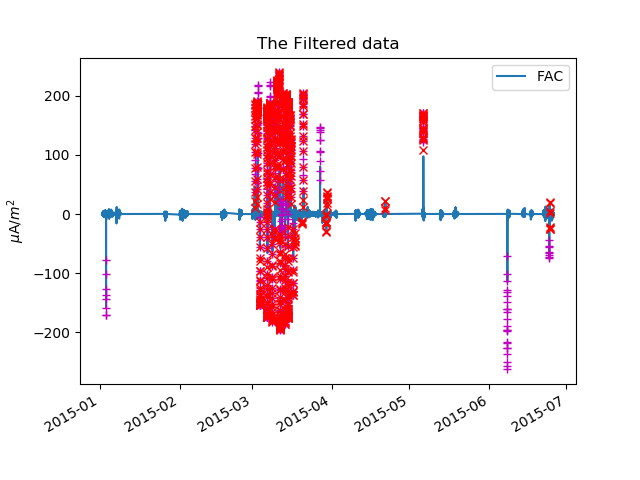

Text(0.5,1,'The Filtered data')

In [26]:
plt.figure()

p1 = FAC[~Flag_idx3].FAC.plot(legend=True)
#p4 = plt.plot(FAC[(((FAC.Flags_F%10**4)/1000).astype('int_')>2)].index.values,FAC[(((FAC.Flags_F%10**4)/1000).astype('int_')>2)].FAC.values,'o', color='k')
p3 = plt.plot(FAC[(FAC.Flags_q>440404)].index.values,FAC[(FAC.Flags_q>440404)].FAC.values, '+', color='m')
p2 = plt.plot(FAC[(FAC.Flags_B>10002)].index.values,FAC[(FAC.Flags_B>10002)].FAC.values, 'x', color='r')

p1.set_ylabel('$\mu$A/$m^2$')
plt.title('The Filtered data')

In [27]:
FAC_filter = FAC.copy(deep=True)

In [28]:
flagtime = FAC[Flag_idx3].index.values

start_time= flagtime - np.timedelta64(10, 's')
end_time = flagtime + np.timedelta64(10, 's')

for i in range(0,len(flagtime)):
    FAC_filter.FAC.loc[start_time[i]:end_time[i]] = float('Nan')


In [29]:
FAC_filter=FAC_filter.dropna(how='any')

<IPython.core.display.Javascript object>


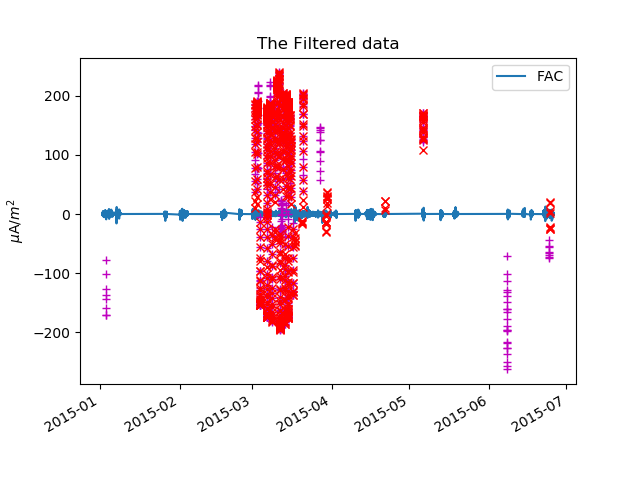

Text(0.5,1,'The Filtered data')

In [30]:
plt.figure()

p1 = FAC_filter.FAC.plot(legend=True)
#p4 = plt.plot(FAC[(((FAC.Flags_F%10**4)/1000).astype('int_')>2)].index.values,FAC[(((FAC.Flags_F%10**4)/1000).astype('int_')>2)].FAC.values,'o', color='k')
p3 = plt.plot(FAC[(FAC.Flags_q>440404)].index.values,FAC[(FAC.Flags_q>440404)].FAC.values, '+', color='m')
p2 = plt.plot(FAC[(FAC.Flags_B>10002)].index.values,FAC[(FAC.Flags_B>10002)].FAC.values, 'x', color='r')

p1.set_ylabel('$\mu$A/$m^2$')
plt.title('The Filtered data')

## Test the new function

In [31]:
import My_functions_v2 as my

Remove obeservation with "Discrepancy between ASM and VFM measurements" and "On-ground aberrational correction of any attitude sample among 4 nearest STR samples."

In [32]:
FAC_filter2 = my.filter_FAC(FAC,dt = '10',Flags_B=10002,Flags_q=440404)

1667 observation out off 4287278 are removed


<IPython.core.display.Javascript object>


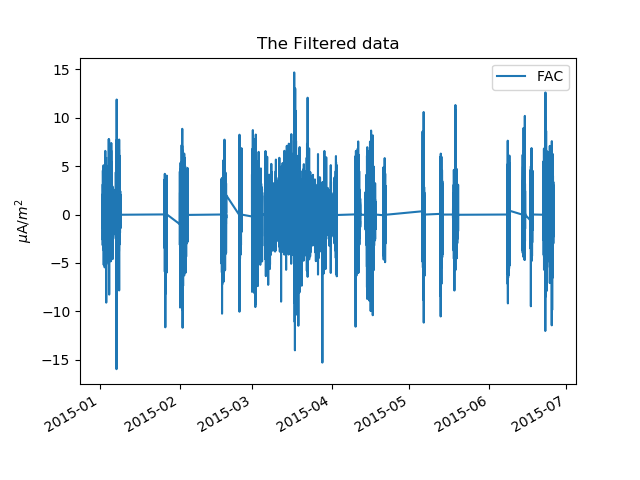

Text(0.5,1,'The Filtered data')

In [33]:
plt.figure()

p1 = FAC_filter2.FAC.plot(legend=True)

p1.set_ylabel('$\mu$A/$m^2$')
plt.title('The Filtered data')

In [34]:
1667/4287278 *100

0.03888247974589005